M044_2024_12_04_09_30: VAF and Pairwise Correlation, all neurons

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal

from tools import dataTools as dt
from tools.dsp import preprocessing as prep
from tools import params
from tools.params import Params
from tools.decoding import decodeTools as decode
from sklearn.naive_bayes import GaussianNB

In [2]:
data_dir = "/Users/il620/Desktop/pose/raw"
session = "M044_2024_12_04_09_30"
fname = os.path.join(data_dir, session+"_pyaldata.mat")

In [3]:
df = pyal.mat2dataframe(fname, shift_idx_fields=True)


field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


In [31]:
df["trial_name"]

0             free
1       intertrial
2            trial
3       intertrial
4            trial
           ...    
1064         trial
1065    intertrial
1066         trial
1067    intertrial
1068          free
Name: trial_name, Length: 1069, dtype: object

In [4]:
df.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes'],
      dtype='object')

In [4]:
df["idx_trial_start"]
# idx_earthquake_duration - end of the perturbation session
# CPI - resolution of motion sensor counts per inch
# idx_motion: ball spinning above a threshold; wrt trial


0           -1
1        59999
2        60099
3        60499
4        60599
         ...  
1064    478399
1065    478799
1066    479299
1067    479699
1068    479999
Name: idx_trial_start, Length: 1069, dtype: int64

In [ ]:
trial_conditions = ["idx_trial_start>89999"]

In [4]:
trial_conditions = []

In [7]:
df_gud = prep.preprocess(df,only_trials=True, trial_selection_criteria = ["idx_trial_start>89999"])

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


In [7]:
df_all = prep.preprocess(df)

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 133)


In [8]:
len(df_all)

533

In [6]:
df_["idx_trial_start"]

0       30233
1       30399
2       30633
3       30933
4       31099
        ...  
488    158633
489    158999
490    159233
491    159466
492    159766
Name: idx_trial_start, Length: 493, dtype: int64

In [9]:
df_all["idx_trial_start"]

0       20033
1       20199
2       20366
3       20733
4       21033
        ...  
528    158633
529    158999
530    159233
531    159466
532    159766
Name: idx_trial_start, Length: 533, dtype: int64

In [18]:
df_["idx_sol_on"]

0      66
1      66
2      66
3      66
4      66
       ..
488    66
489    66
490    66
491    66
492    66
Name: idx_sol_on, Length: 493, dtype: int64

In [4]:
df_ = prep.preprocess(df, trial_name = 'intertrial')

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 33)


In [12]:
len(df_trials)

534

In [13]:
df_['values_Sol_direction']

0       5
1       1
2       7
3       2
4       0
       ..
529     7
530     6
531     1
532     5
533    []
Name: values_Sol_direction, Length: 534, dtype: object

In [5]:
df_trials = prep.preprocess(df, trial_name = 'intertrial')

/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 33)


In [8]:
df_["sol_level_id"]

0       0
1       0
2       1
3       0
4       0
       ..
529     1
530     1
531     0
532     0
533    []
Name: sol_level_id, Length: 534, dtype: object

In [ ]:
df

animal                session  trial_id  trial_name  trial_length  \
0      M044  M044_2024_12_04_09_30         0        free         60001   
1      M044  M044_2024_12_04_09_30         1  intertrial           101   
2      M044  M044_2024_12_04_09_30         2       trial           401   
3      M044  M044_2024_12_04_09_30         3  intertrial           101   
4      M044  M044_2024_12_04_09_30         4       trial           401   
...     ...                    ...       ...         ...           ...   
1064   M044  M044_2024_12_04_09_30      1064       trial           401   
1065   M044  M044_2024_12_04_09_30      1065  intertrial           501   
1066   M044  M044_2024_12_04_09_30      1066       trial           401   
1067   M044  M044_2024_12_04_09_30      1067  intertrial           301   
1068   M044  M044_2024_12_04_09_30      1068        free         54001   

      bin_size  idx_trial_start  idx_trial_end idx_CPI  \
0         0.01               -1          59999      []   
1         0.01            59999          60099      []   
2         0.01            60099          60499      []   
3         0.01            60499          60599      []   
4         0.01            60599          60999      []   
...        ...              ...            ...     ...   
1064      0.01           478399         478799      []   
1065      0.01           478799         479299      []   
1066      0.01           479299         479699      []   
1067      0.01           479699         479999      []   
1068      0.01           479999         533999      []   

     values_before_camera_trigger  ... idx_Sol_direction values_Sol_duration  \
0                             1.0  ...                []                  []   
1                              []  ...                99                  50   
2                              []  ...                -1                  50   
3                              []  ...                99                 100   
4                              []  ...                -1                 100   
...                           ...  ...               ...                 ...   
1064                           []  ...                -1                 100   
1065                           []  ...               499                 100   
1066                           []  ...                -1                 100   
1067                           []  ...                []                  []   
1068                           []  ...                []                  []   

     idx_Sol_duration idx_sol_on idx_earthquake_duration idx_session_timer  \
0                  []         []                      []                []   
1                  99         []                      []                []   
2                  -1        199                      []                []   
3                  99         []                      []                []   
4                  -1        199                      []                []   
...               ...        ...                     ...               ...   
1064               -1        199                      []                []   
1065              499         []                      []                []   
1066               -1        199                      []                []   
1067               []         []                     299                []   
1068               []         []                      -1             53999   

                                          all_chan_best  \
0     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
2     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
3     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
4     [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
...                                                 ...   
1064  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1065  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 

In [20]:
df_intertrial = pyal.select_trials(df, f"trial_name == 'intertrial'") 

In [21]:
df_intertrial["values_Sol_direction"]

0       5
1       1
2       7
3       2
4       0
       ..
529     7
530     6
531     1
532     5
533    []
Name: values_Sol_direction, Length: 534, dtype: object

In [22]:
df_trials["values_Sol_direction"]

0       5
1       1
2       7
3       2
4       0
       ..
529     7
530     6
531     1
532     5
533    []
Name: values_Sol_direction, Length: 534, dtype: object

In [23]:
len(df)

1069

In [79]:

df__["M1_rates"] = [df__["all_rates"][i][:,300:] for i in range(len(df__))]
df__["Dls_rates"] = [df__["all_rates"][i][:,0:300] for i in range(len(df__))]


In [20]:
area = "M1"
n_components = 30
epoch = Params.before_perturb_epoch
# epoch = None
model = "pca"
category = 'values_Sol_direction'
classifier = GaussianNB

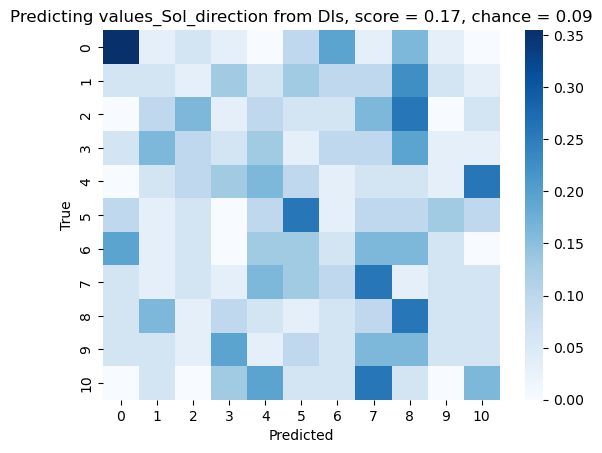

In [17]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_gud], area = area, n_components = n_components, epoch = epoch, model = model)

In [15]:
within_results = decode.within_decoding(cat = category,  allDFs = [df_gud], area = area, n_components = n_components, epoch = epoch, model = model)

In [16]:
within_results

{'M044_2024_12_04_09_30': 0.16994884910485933}

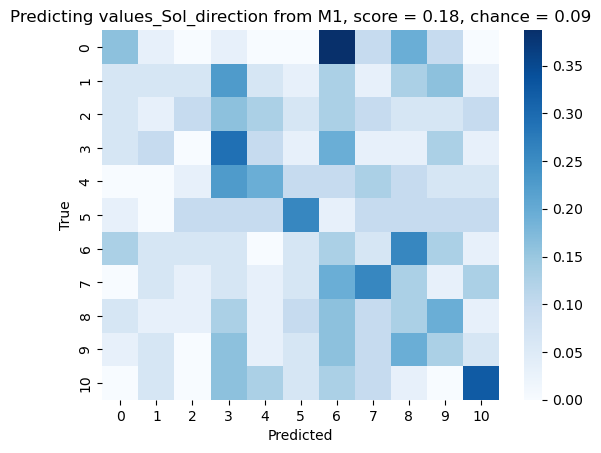

In [21]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_gud], area = area, n_components = n_components, epoch = epoch, model = model)

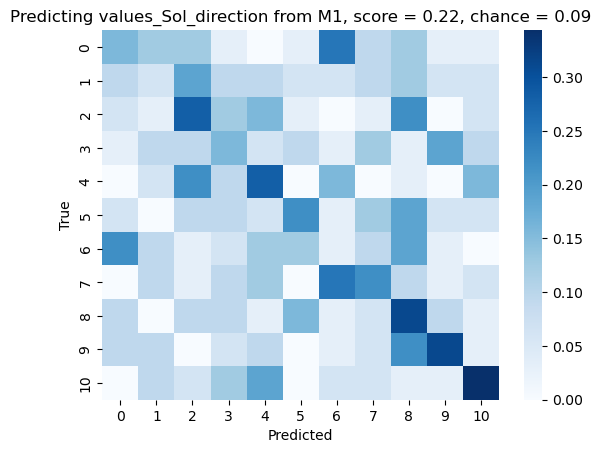

In [ ]:
#  percentage of class that was predicted correctly
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_gud], area = area, n_components = n_components, epoch = epoch, model = model)

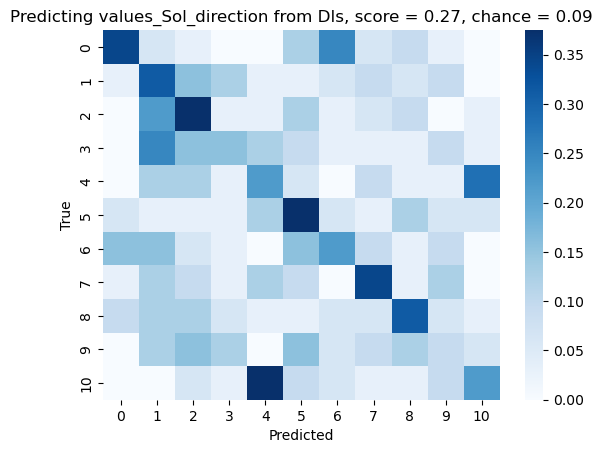

In [8]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = category, ax = ax,  allDFs = [df_], area = "Dls", n_components = n_components, epoch = epoch, model = model)

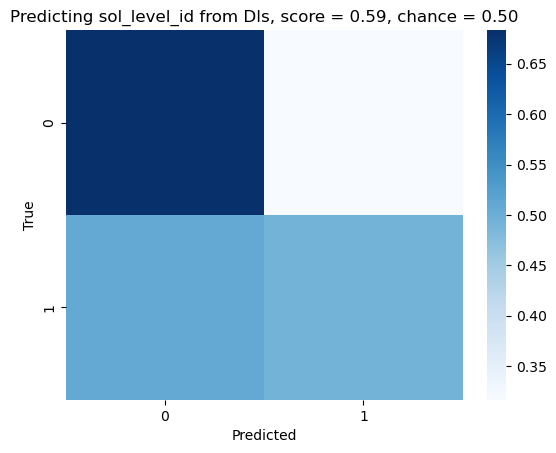

In [10]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "sol_level_id", ax = ax,  allDFs = [df_], area = "Dls", n_components = n_components, epoch = epoch, model = model)

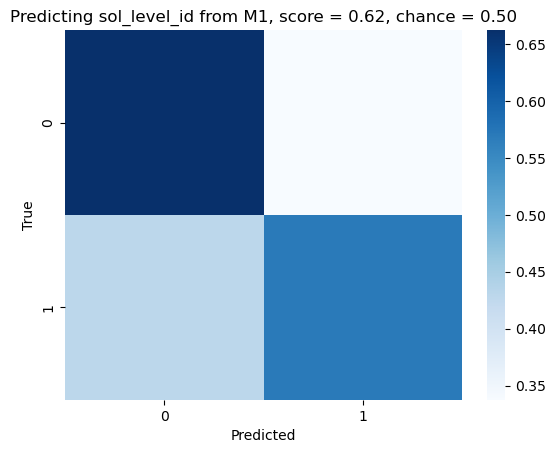

In [11]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "sol_level_id", ax = ax,  allDFs = [df_], area = "M1", n_components = n_components, epoch = epoch, model = model)

(4, 71, 17, 30)


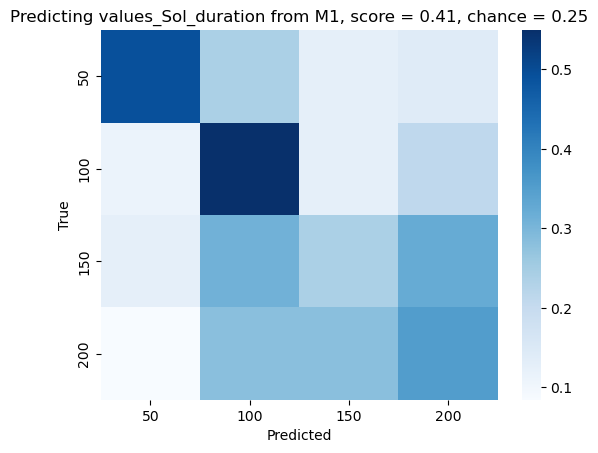

In [22]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "values_Sol_duration", ax = ax,  allDFs = [df_], area = "M1", n_components = n_components, epoch = epoch, model = model)

(4, 71, 17, 30)


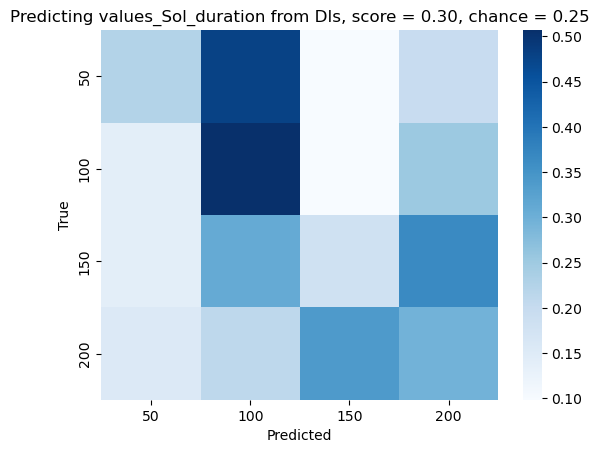

In [23]:
fig, ax = plt.subplots()
within_results = decode.within_decoding(cat = "values_Sol_duration", ax = ax,  allDFs = [df_], area = "Dls", n_components = n_components, epoch = epoch, model = model)

In [11]:
areas = ["Dls", "M1"]
n_components = 30
model = "pca"
category = 'sol_level_id'
classifier = GaussianNB
idx_event = 'idx_sol_on'
min_time = 0
max_time = 2

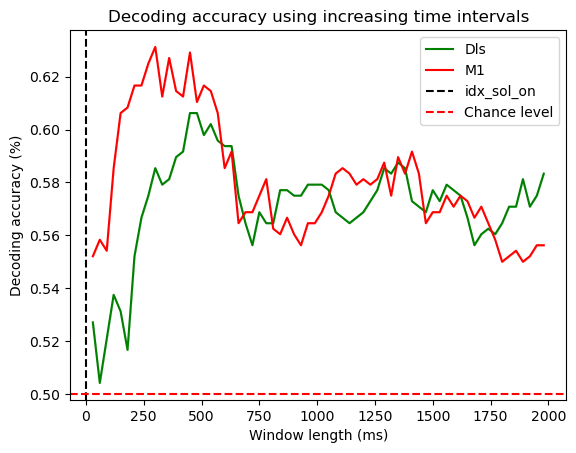

In [12]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

In [21]:
areas = ["Dls", "M1"]
n_components = 30
model = "pca"
category = 'values_Sol_direction'
classifier = GaussianNB
idx_event = 'idx_sol_on'
min_time = 0
max_time = 2

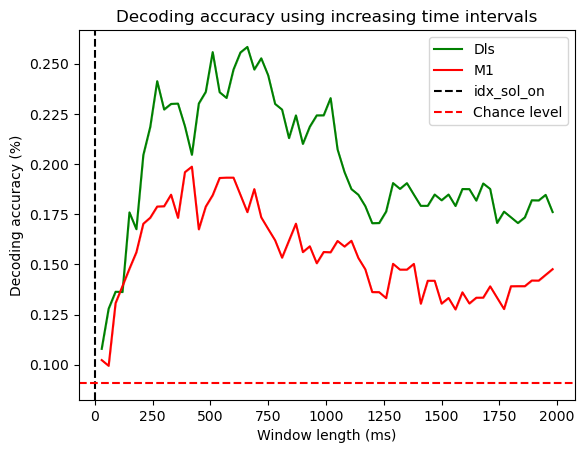

In [26]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

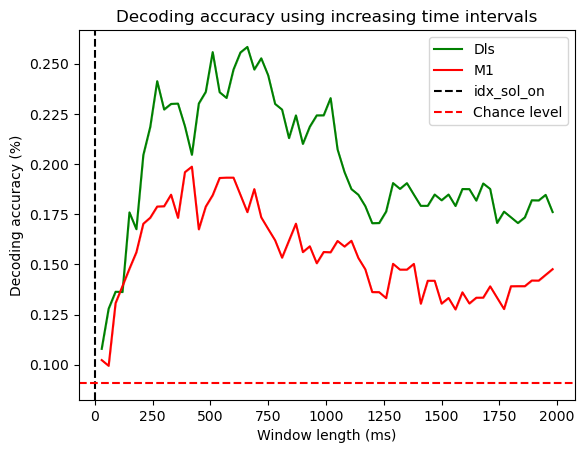

In [14]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model)

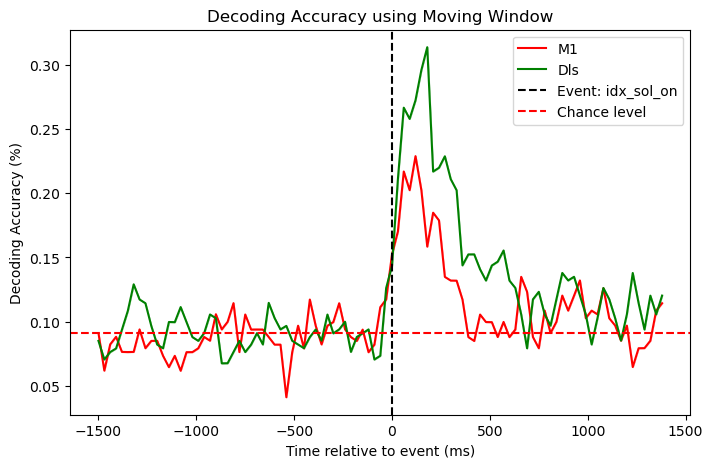

In [28]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

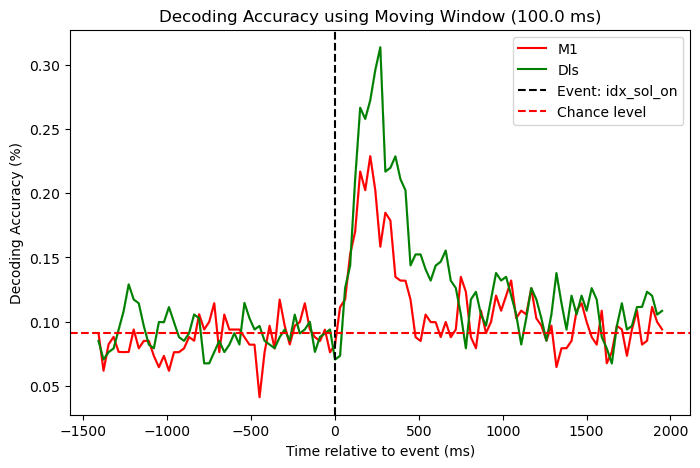

In [38]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=2,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

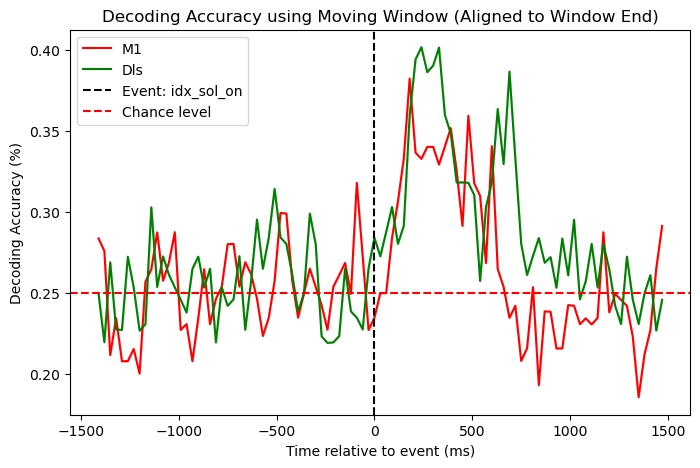

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_duration", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

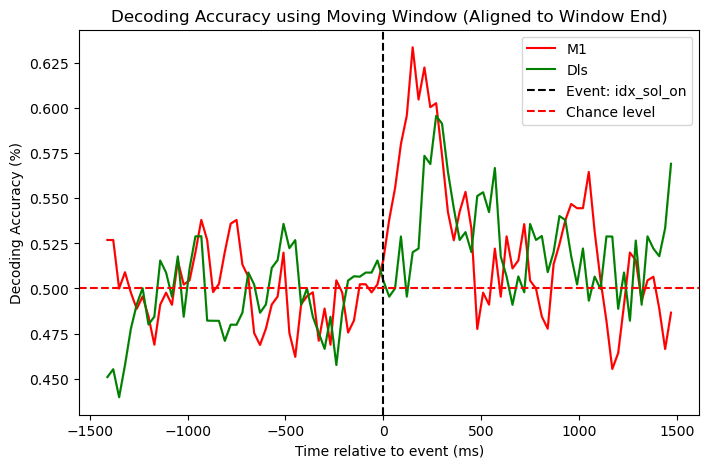

In [34]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="sol_level_id", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=30, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

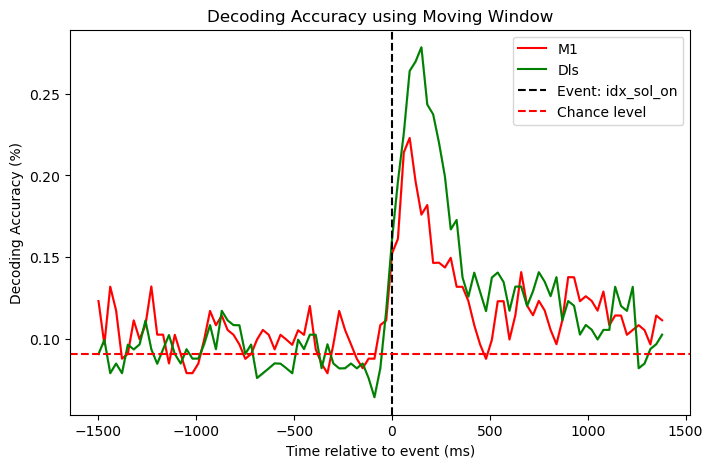

In [29]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=10, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

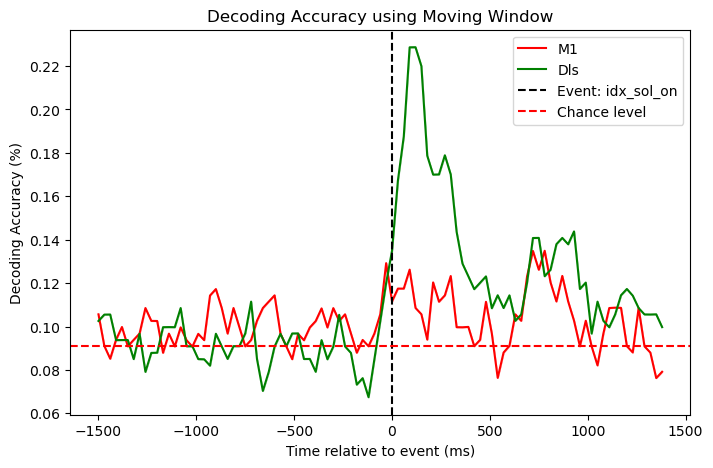

In [30]:
fig, ax = plt.subplots(figsize=(8,5))

decode.plot_decoding_moving_window(
    ax, category="values_Sol_direction", df_list=[df_gud], 
    areas=["M1", "Dls"], n_components=3, model="pca",
    idx_event="idx_sol_on", min_time=-1.5, max_time=1.5,
    window_length=0.1, step=0.05, trial_conditions=[]
)

plt.show()

In [30]:
df__ = pyal.select_trials(df_, "values_Sol_duration == 150")

In [35]:
df_["values_Sol_duration"]

0       50
1       50
2      100
3      150
4      200
      ... 
488    200
489    150
490    200
491    100
492    100
Name: values_Sol_duration, Length: 493, dtype: object

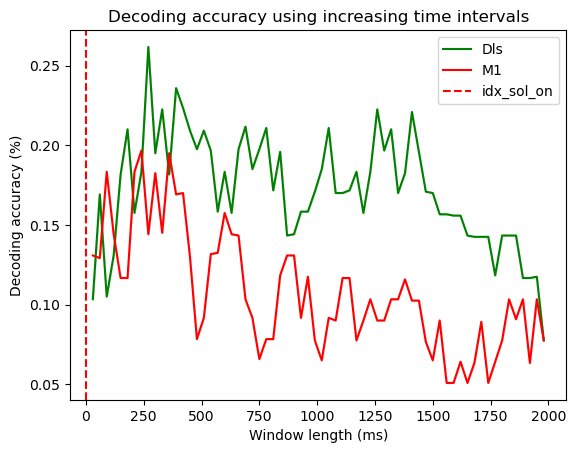

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = category, df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 150"])

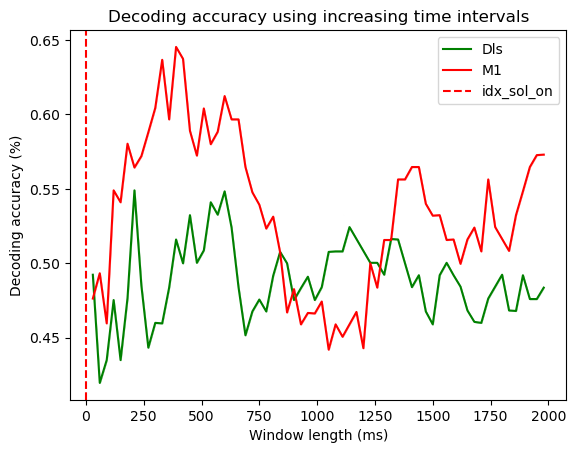

In [40]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 150"])

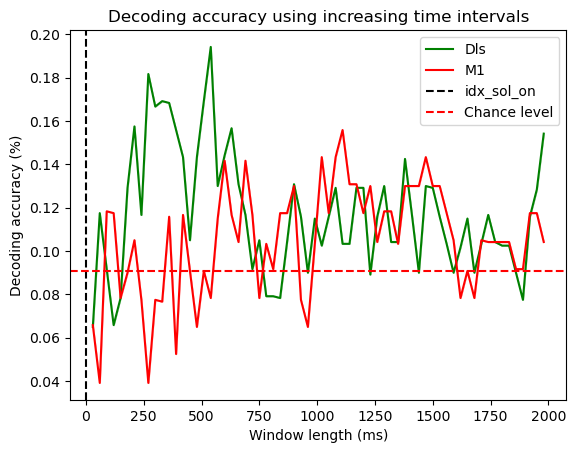

In [27]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "values_Sol_direction", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 150"])

ValueError: n_splits=5 cannot be greater than the number of members in each class.

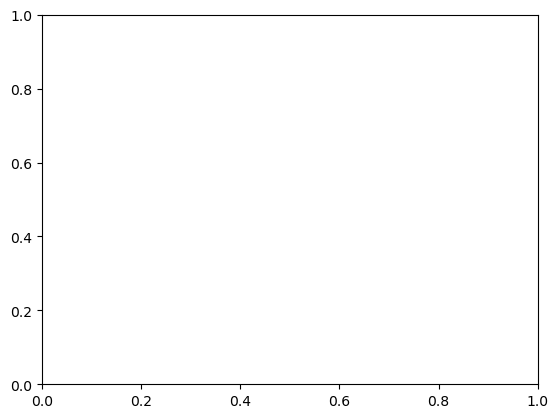

In [56]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "values_Sol_direction", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 100"])

In [30]:
np.sum(df_["values_Sol_duration"]==50)

71

In [36]:
np.sum(df_["values_Sol_duration"]==100)

150

In [32]:
np.sum(df_["values_Sol_duration"]==150)

158

In [33]:
np.sum(df_["values_Sol_duration"]==200)

154

In [34]:
np.sum(df_["values_Sol_duration"]==250)

0

In [ ]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "values_Sol_direction", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 200"])

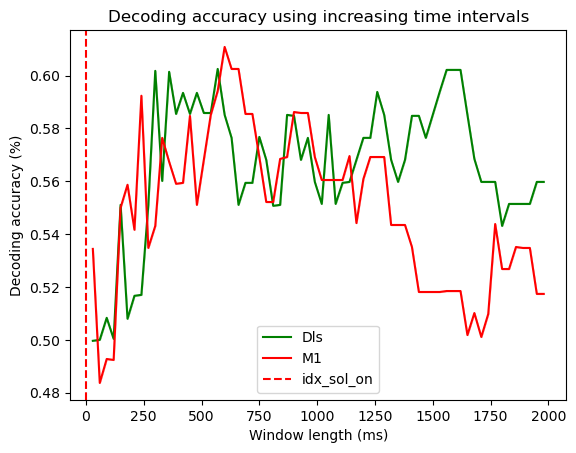

In [41]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 100"])


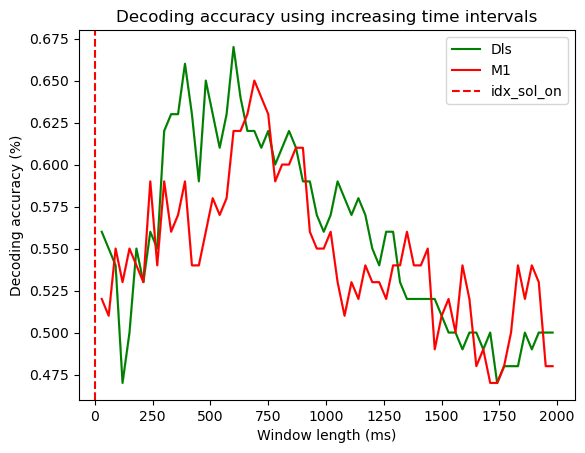

In [42]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 200"])


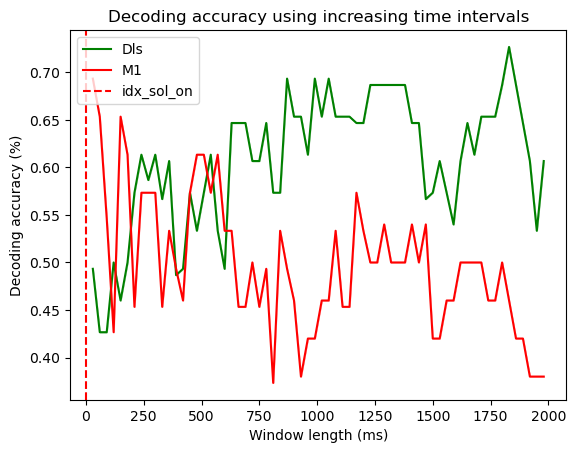

In [43]:
fig, ax = plt.subplots()
decode.plot_decoding_over_time(ax = ax, category = "sol_level_id", df_list = [df_], areas = areas, n_components = n_components, model = model, trial_conditions = ["values_Sol_duration == 50"])


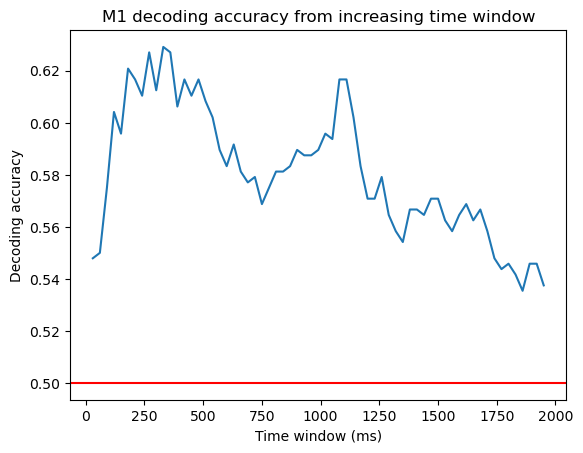

In [30]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("M1 decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/2, color='r', linestyle='-')

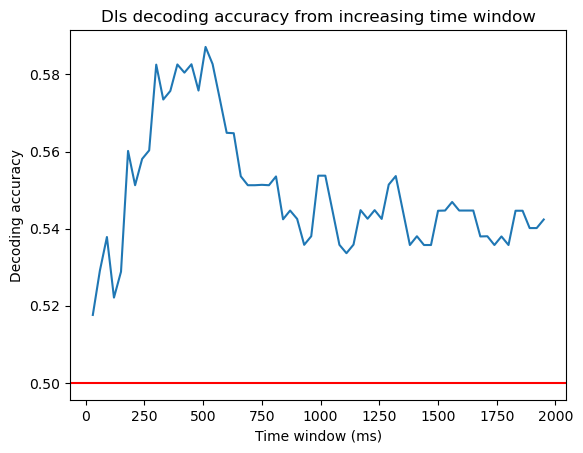

In [23]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("Dls decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/2, color='r', linestyle='-')

In [10]:
df_["trial_length"]


0      401
1      401
2      401
3      401
4      401
      ... 
488    401
489    401
490    401
491    401
492    401
Name: trial_length, Length: 493, dtype: int32

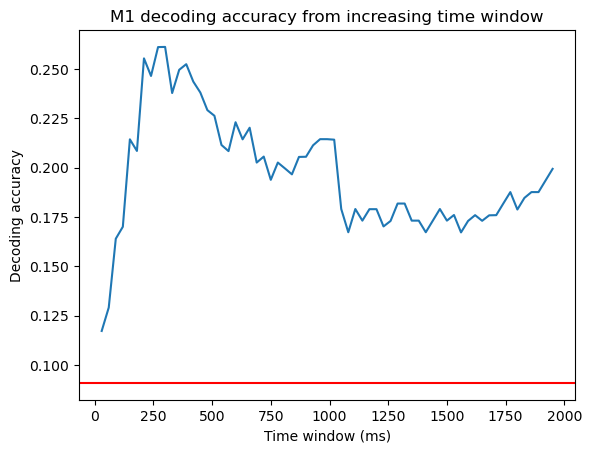

In [17]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("M1 decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/11, color='r', linestyle='-')

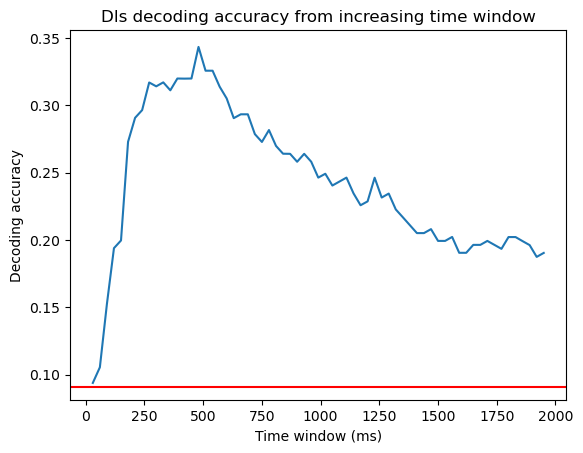

In [19]:
within_results_comparison = []
for timepoint in range(1,66):
    perturb_epoch = pyal.generate_epoch_fun(start_point_name='idx_sol_on',
                                        rel_start=int(0),
                                        rel_end=int(timepoint)
                                        )
    within_results = decode.within_decoding(cat = category,  allDFs = [df_], area = area, n_components = n_components, epoch = perturb_epoch, model = model)
    within_results_comparison.append(within_results['M044_2024_12_04_09_30'])

within_results_comparison = np.array(within_results_comparison)
x_axis = np.arange(1,66)*30
plt.plot(x_axis, within_results_comparison)
plt.title("Dls decoding accuracy from increasing time window")
plt.xlabel("Time window (ms)")
plt.ylabel("Decoding accuracy")
plt.axhline(y=1/11, color='r', linestyle='-')

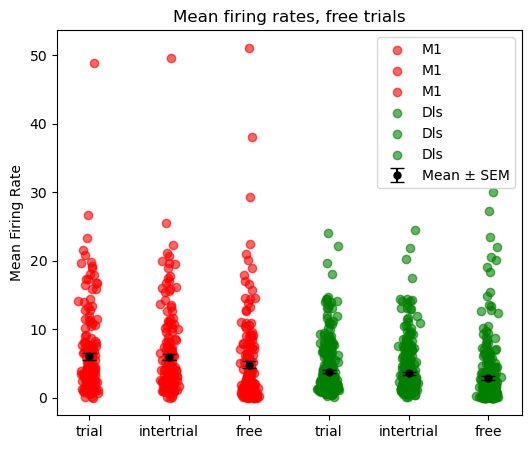

In [60]:
from tools.viz import mean_firing as firing
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))
trial_types = ['trial', 'intertrial','free']
firing.compare_mean_firing(ax,df__,areas = areas,trial_types=trial_types)


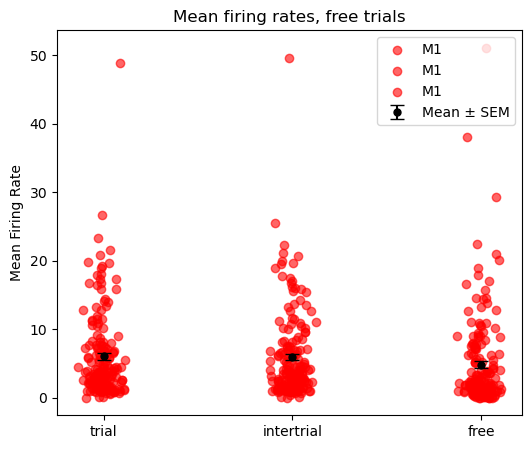

In [59]:
from tools.viz import mean_firing as firing
areas = ["M1"]
fig, ax = plt.subplots(figsize=(6, 5))
trial_types = ['trial', 'intertrial','free']
firing.compare_mean_firing(ax,df__,areas = areas,trial_types=trial_types)

In [ ]:
fig=gs.figure
    
dfs=[]
axes=[]
category = "values_Sol_direction"
targets = np.unique(df[category])

df_ = pyal.restrict_to_interval(df,epoch_fun = epoch) if epoch is not None else session
for area in areas:
    for trial_type in trial_types:
        df__ = pyal.select_trials(df_, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df[area+'_rates'].values, axis=0) # rates contains the values of M1_rates in all trials concatenated, there are 239 trials, each with 15 timepoints and 87 units, so rates has size 239x15, 87

        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates) ## create PCA model fit to the rates matrix 
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca'); ## apply PCA model on the dataframe (each trial) for session 1, this will add a new column to the dataframe, for each trial there will be a matrix 15x10 corresponding to the 15 timepoints in the trial and the 10 PCA components
        ax = fig.add_subplot(gs[i], projection='3d',fc='None')
        axes.append(ax)
        for tar in targets: ## all trials in a session corresponding to one type of trial (a certain target) are averaged and plotted
            df____ = pyal.select_trials(df___, df_[category]==tar)
            ex = pyal.get_sig_by_trial(df____,'_pca')
            ex = np.mean(ex, axis=2)[:,:3]
            ax.plot(ex[:,0],ex[:,1],ex[:,2],lw=1)
            ax.view_init(60,-47)


titles=[r'Monkey K (unaligned)',r'Monkey L (unaligned)',
        r'Monkey K (aligned)',  r'Monkey L (aligned)']
labels = ['PC','PC','CC','CC']
for i, ax in enumerate(axes):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel(f'{labels[i]}1', labelpad=-15, fontsize=9)
    ax.set_ylabel(f'{labels[i]}2', labelpad=-15, fontsize=9)
    ax.set_zlabel(f'{labels[i]}3', labelpad=-15, fontsize=9)
    ax.set_title(titles[i], y=.9, loc='center', fontsize= 9)

#======== add the arrow

ax = fig.add_subplot(gs[2], fc='None')
ax.arrow(0,0,1,0,length_includes_head=True, width=.005, head_width=.015,head_length=.1, ec=epoch_to_color(epoch1) if epoch1 is not None else epoch_to_color(epoch), fc=epoch_to_color(epoch1) if epoch1 is not None else epoch_to_color(epoch))
ax.set_ylim([-.1,.1])
ax.set_xlim([-.5,1.1])



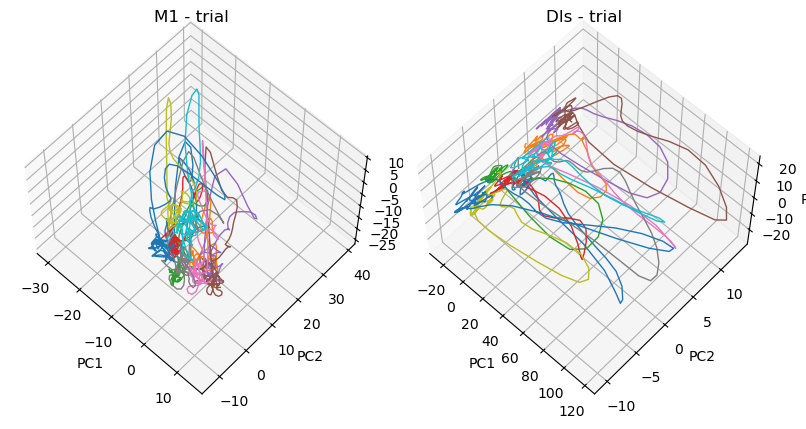

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud

# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

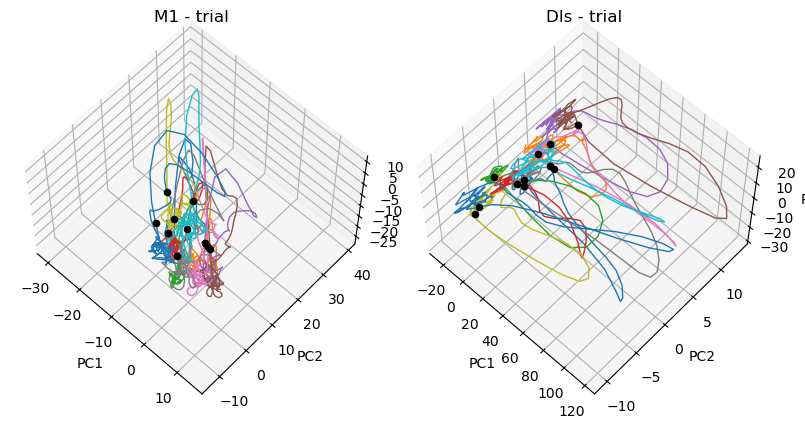

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

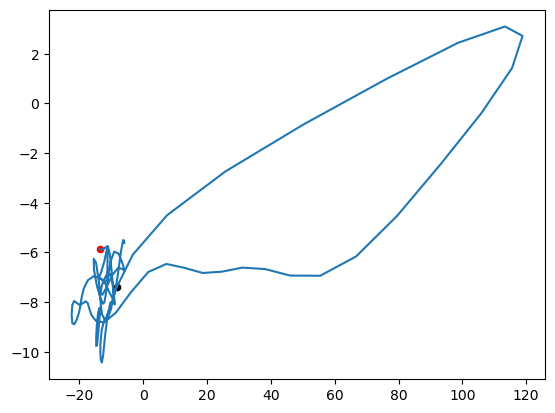

In [120]:
plt.plot(ex[:, 0], ex[:, 1])
plt.scatter(ex[timepoint, 0], ex[timepoint, 1], 
                           color='k', s=20, marker='o')
plt.scatter(ex[0, 0], ex[0, 1], 
                           color='r', s=20, marker='o')

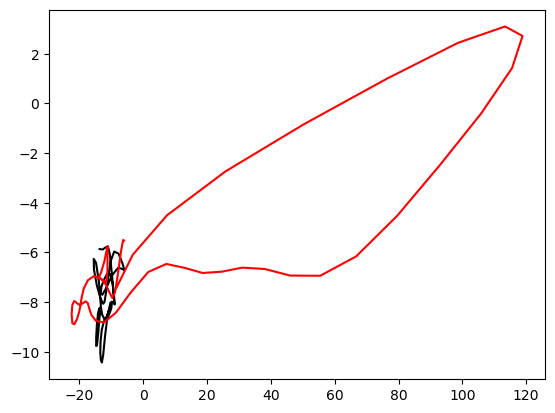

In [121]:
plt.plot(ex[0:timepoint, 0], ex[0:timepoint, 1], color = 'k')
plt.plot(ex[timepoint:-1, 0], ex[timepoint:-1, 1], color = 'r')

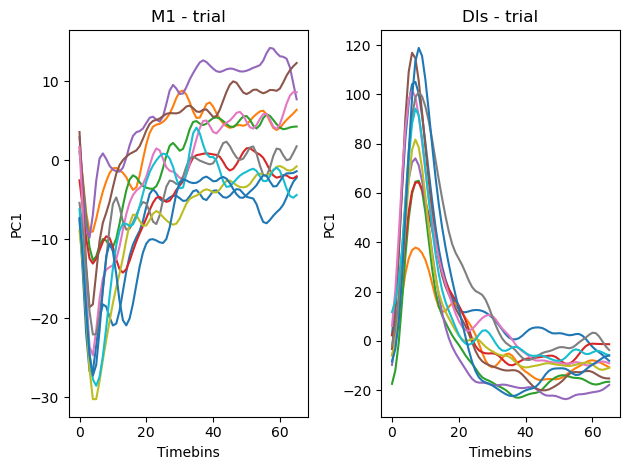

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[timepoint:-1, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

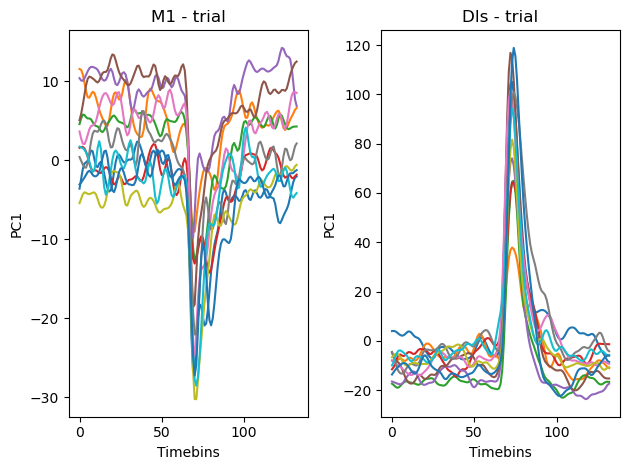

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[:, 0])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC1")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

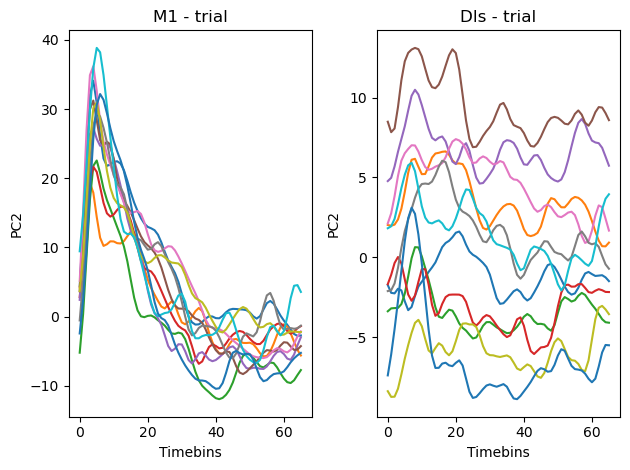

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[timepoint:-1, 1])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC2")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()


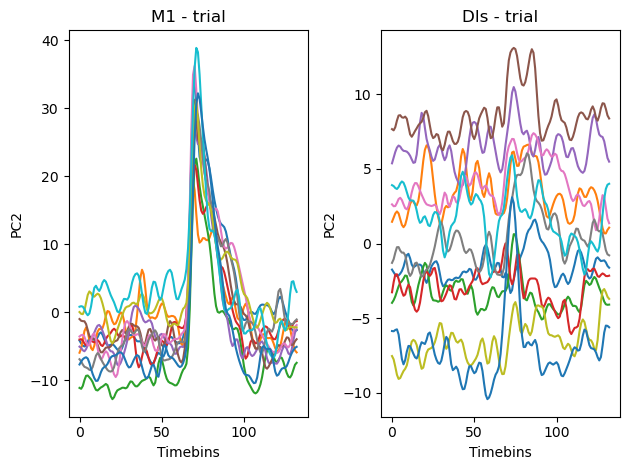

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(1, 2)

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.plot(ex[:, 1])
            

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("Timebins")
        ax.set_ylabel("PC2")
        # ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()


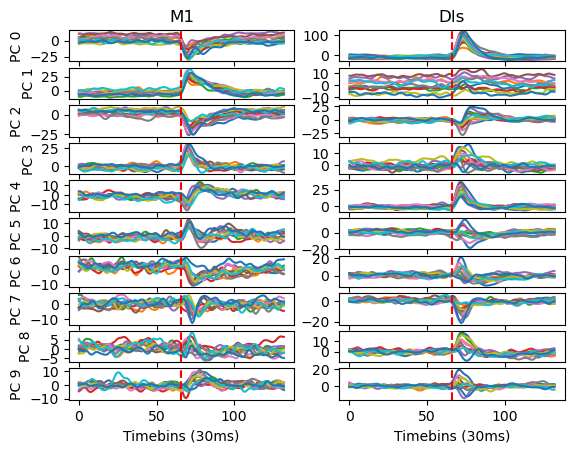

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 10
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

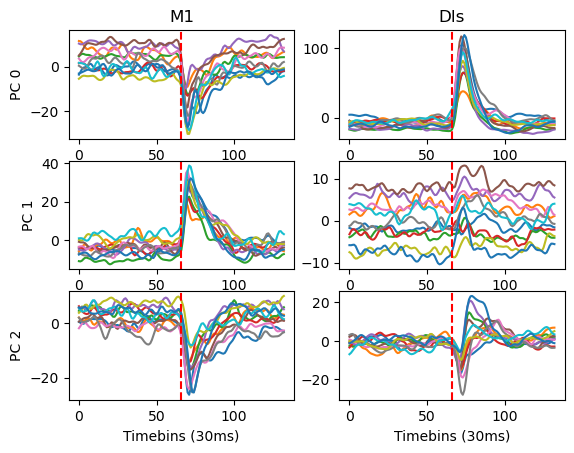

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

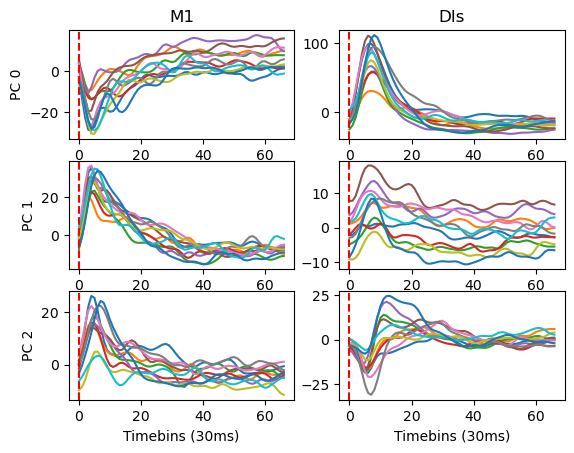

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

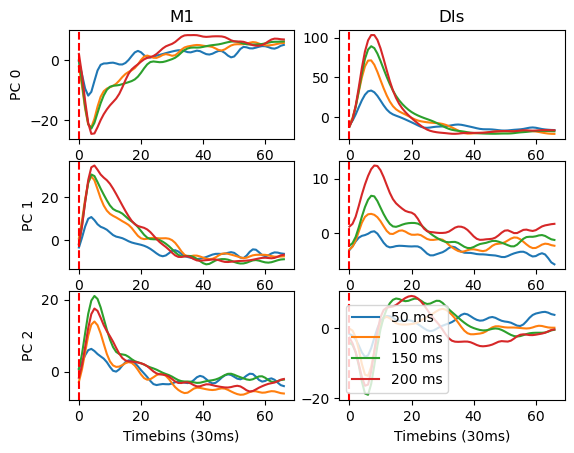

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_duration"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row],label=f"{tar} ms")
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
ax.legend()
plt.show()


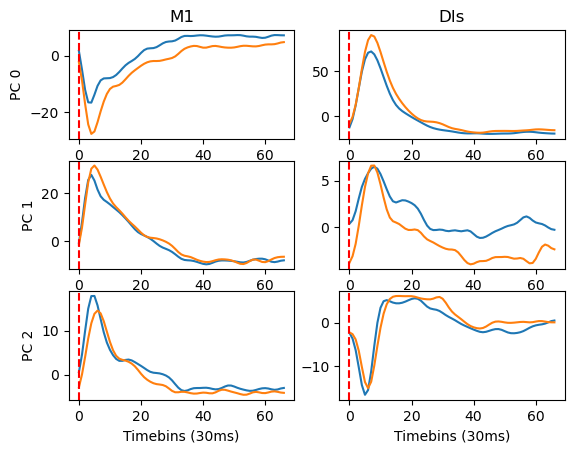

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch
n_components = 3


df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
targets = np.unique(df__[category])
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        if col==0:
            ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None
n_components = 10
targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = n_components  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_components, 2)
df__ = pyal.select_trials(df_int, f"trial_name == 'trial'")
# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row in range(n_components):
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :n_components]  # Reduce to first 3 PCA components
            ax.plot(ex[:, row])
            

        # Titles and labels
        ax.axvline(x = timepoint,color = 'r',linestyle="--" )
        if row==0:
            ax.set_title(f"{area}")
        ax.set_ylabel(f"PC {row}")
    ax.set_xlabel("Timebins (30ms)")
        # ax.set_zlabel("PC3")

# plt.tight_layout()
plt.show()

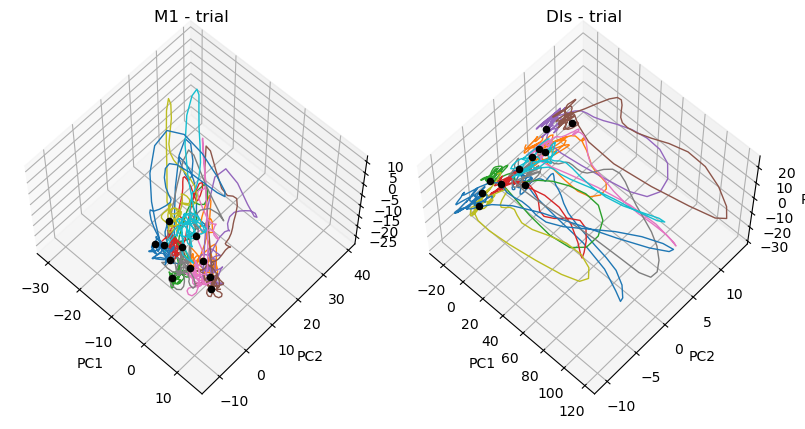

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = 0
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

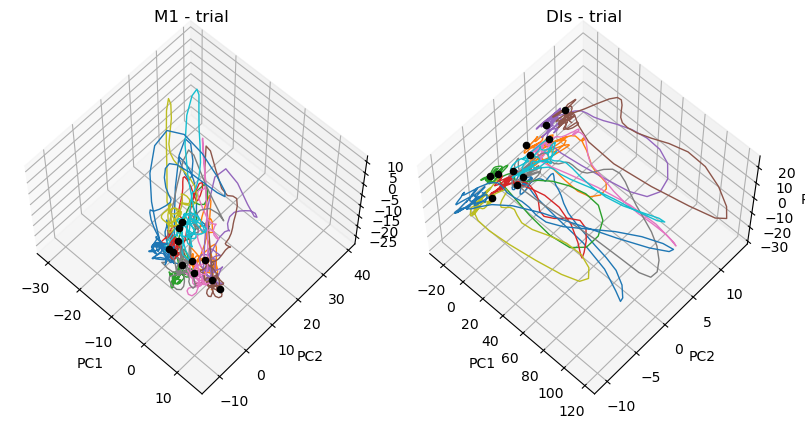

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = -1
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

In [ ]:
plt.plot()

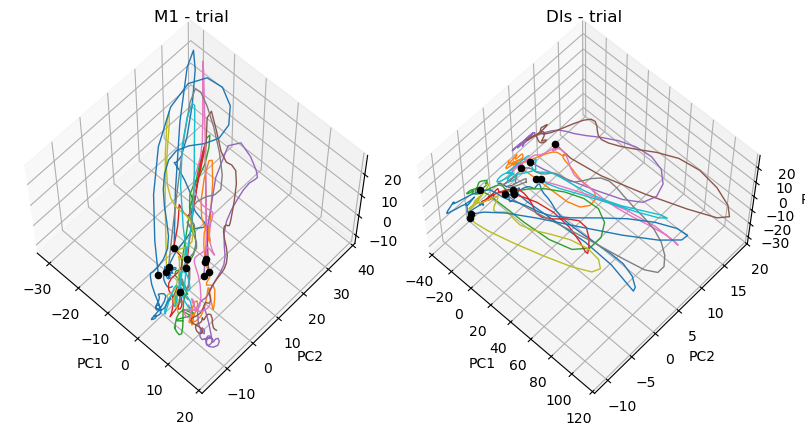

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

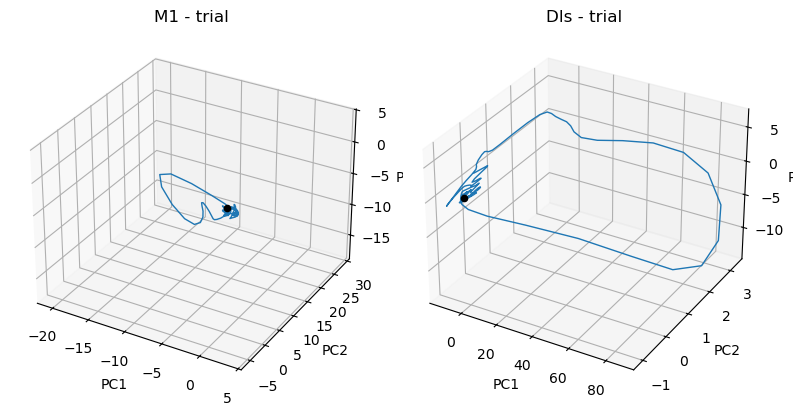

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df__, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = 0
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        
        ex = pyal.get_sig_by_trial(df___, '_pca')
        ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
        ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                        color='k', s=20, marker='o', label="Sol on")

        ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
        # ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

ValueError: need at least one array to stack

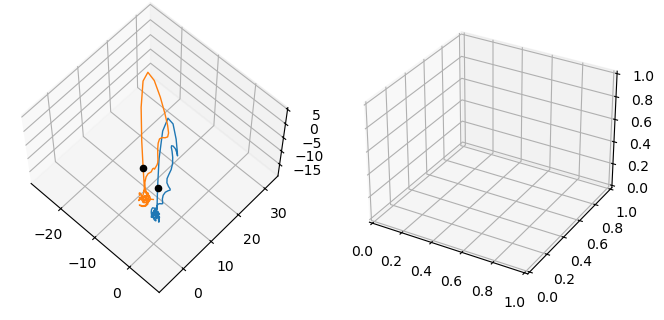

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

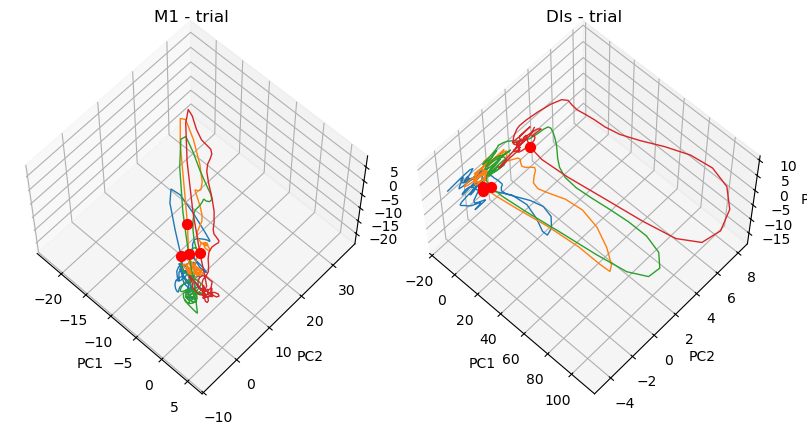

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_duration"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='k', s=20, marker='o', label="Sol on")
            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

In [91]:
timepoint

0

ValueError: need at least one array to stack

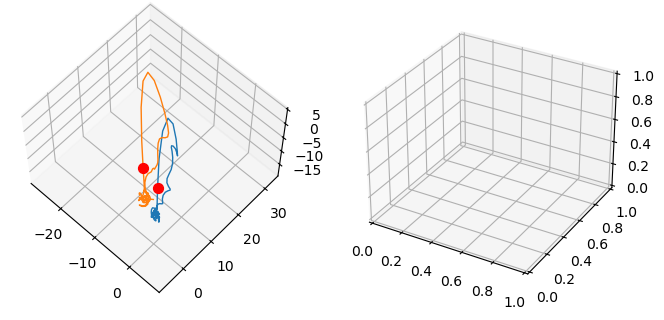

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = None

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df__
timepoint = df_int['idx_sol_on'][0]
# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components
            ax.scatter(ex[timepoint, 0], ex[timepoint, 1], ex[timepoint, 2], 
                           color='r', s=50, marker='o', label="Sol on")

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

/var/folders/v9/9wtn6zt543lb0rrkxlhvdkc00000gp/T/ipykernel_58344/2388013157.py:15: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [  83   85   87   89   91   93   95   97   99  101  103  105  107  109
  111  113  115  117  119  121  123  125  127  129  131  133  135  137
  139  141  143  145  147  149  151  153  155  157  159  161  163  165
  167  169  171  173  175  177  179  181  183  185  187  189  191  193
  195  197  199  201  203  205  207  209  211  213  215  217  219  221
  223  225  227  229  231  233  235  237  239  241  243  245  247  249
  251  253  255  257  259  261  263  265  267  269  271  273  275  277
  279  281  283  285  287  289  291  293  295  297  299  301  303  305
  307  309  311  313  315  317  319  321  323  325  327  329  331  333
  335  337  339  341  343  345  347  349  351  353  355  357  359  361
  363  365  367  369  371  373  375  377  379  381  383  385  

ValueError: need at least one array to stack

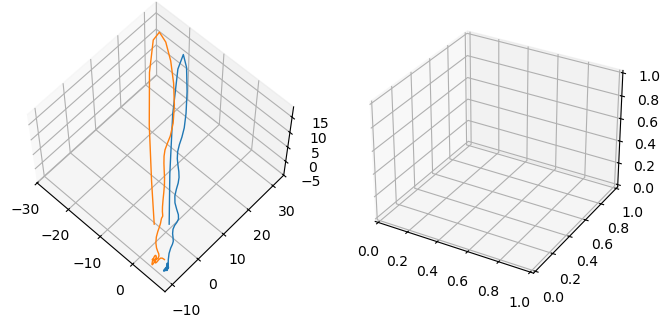

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "sol_level_id"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud

# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

/var/folders/v9/9wtn6zt543lb0rrkxlhvdkc00000gp/T/ipykernel_58344/3330352173.py:15: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [  83   85   87   89   91   93   95   97   99  101  103  105  107  109
  111  113  115  117  119  121  123  125  127  129  131  133  135  137
  139  141  143  145  147  149  151  153  155  157  159  161  163  165
  167  169  171  173  175  177  179  181  183  185  187  189  191  193
  195  197  199  201  203  205  207  209  211  213  215  217  219  221
  223  225  227  229  231  233  235  237  239  241  243  245  247  249
  251  253  255  257  259  261  263  265  267  269  271  273  275  277
  279  281  283  285  287  289  291  293  295  297  299  301  303  305
  307  309  311  313  315  317  319  321  323  325  327  329  331  333
  335  337  339  341  343  345  347  349  351  353  355  357  359  361
  363  365  367  369  371  373  375  377  379  381  383  385  

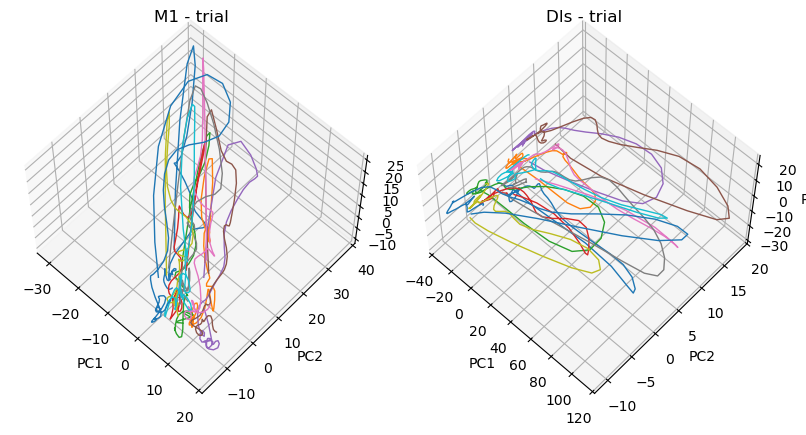

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

dfs = []
axes = []
category = "values_Sol_direction"
areas = ["M1","Dls"]
trial_types = ['trial']
epoch = Params.perturb_epoch

targets = np.unique(df_gud[category])

df_int = pyal.restrict_to_interval(df_gud, epoch_fun=epoch) if epoch is not None else df_gud

# Define subplot grid dimensions
n_rows = len(trial_types)  # Rows: trial types
n_cols = len(areas)        # Columns: areas
fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'}, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is a 2D array for easy indexing
axes = np.array(axes).reshape(n_rows, n_cols)

# Loop through areas (columns) and trial types (rows)
for col, area in enumerate(areas):
    for row, trial_type in enumerate(trial_types):
        df__ = pyal.select_trials(df_int, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df__[area+'_rates'].values, axis=0)  # Shape: (239 trials, 15 timepoints, 87 units)

        # Fit PCA model
        rates_model = PCA(n_components=n_components, svd_solver='full').fit(rates)
        
        # Apply PCA to the dataframe
        df___ = pyal.apply_dim_reduce_model(df__, rates_model, area+'_rates', '_pca')

        # Select the correct subplot
        ax = axes[row, col]

        # Loop through targets and plot averaged trials
        for tar in targets:
            df____ = pyal.select_trials(df___, df___[category] == tar)
            ex = pyal.get_sig_by_trial(df____, '_pca')
            ex = np.mean(ex, axis=2)[:, :3]  # Reduce to first 3 PCA components

            ax.plot(ex[:, 0], ex[:, 1], ex[:, 2], lw=1)
            ax.view_init(60, -47)

        # Titles and labels
        ax.set_title(f"{area} - {trial_type}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

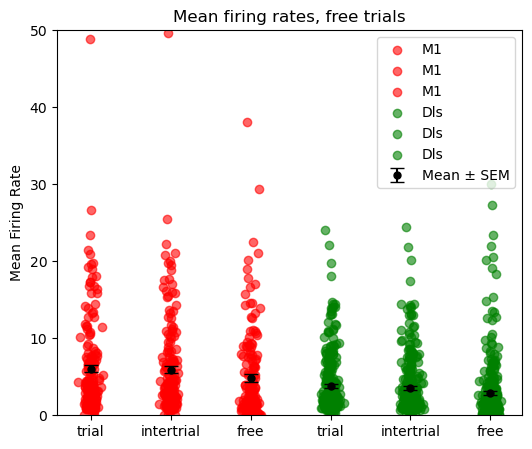

In [50]:
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))

mean_values = []
std_errors = []
trial_types = ['trial', 'intertrial','free']
i = 0
for area in areas:
    # Concatenate all timepoints to get (timepoints * trials, neurons)
    for trial_type in trial_types:
        df___ = pyal.select_trials(df__, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df___[f"{area}_rates"].values, axis=0)
        
        # Compute mean firing rate per neuron
        mean_firing_rates = rates.mean(axis=0)

        # Compute overall mean and standard error
        mean_area = mean_firing_rates.mean()
        std_error = mean_firing_rates.std() / np.sqrt(len(mean_firing_rates))  # Standard Error of the Mean (SEM)

        mean_values.append(mean_area)
        std_errors.append(std_error)

        # Jitter x positions for scatter plot to avoid overlap
        jitter_x = np.random.normal(i, 0.05, size=len(mean_firing_rates))

        # Scatter plot of individual neuron firing rates
        ax.scatter(jitter_x, mean_firing_rates, alpha=0.6, label=f"{area}", color=getattr(params.colors, area, "k"))
        i+=1
# Overlay mean firing rate with error bars
ax.errorbar(range(len(areas)*len(trial_types)), mean_values, yerr=std_errors, fmt='o', capsize=5, markersize=5, color="k", label="Mean ± SEM")

# Labels and formatting
ax.set_xticks(range(len(areas)*len(trial_types)))
ax.set_xticklabels(trial_types*len(areas))
ax.set_ylabel("Mean Firing Rate")
ax.set_title("Mean firing rates, free trials")
ax.set_ylim([0, 50])
ax.legend()

plt.show()

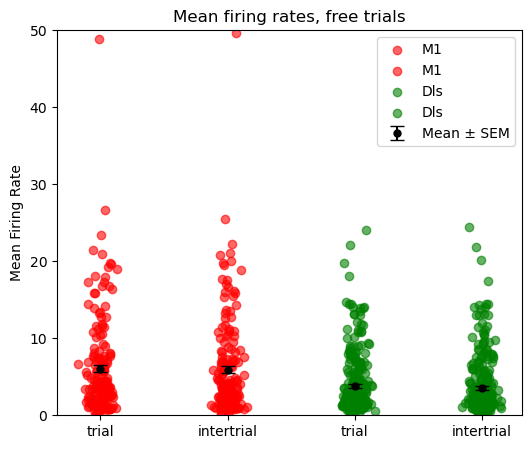

In [51]:
areas = ["M1", "Dls"]
fig, ax = plt.subplots(figsize=(6, 5))

mean_values = []
std_errors = []
trial_types = ['trial', 'intertrial']
i = 0
for area in areas:
    # Concatenate all timepoints to get (timepoints * trials, neurons)
    for trial_type in trial_types:
        df___ = pyal.select_trials(df__, f"trial_name == '{trial_type}'")
        rates = np.concatenate(df___[f"{area}_rates"].values, axis=0)
        
        # Compute mean firing rate per neuron
        mean_firing_rates = rates.mean(axis=0)

        # Compute overall mean and standard error
        mean_area = mean_firing_rates.mean()
        std_error = mean_firing_rates.std() / np.sqrt(len(mean_firing_rates))  # Standard Error of the Mean (SEM)

        mean_values.append(mean_area)
        std_errors.append(std_error)

        # Jitter x positions for scatter plot to avoid overlap
        jitter_x = np.random.normal(i, 0.05, size=len(mean_firing_rates))

        # Scatter plot of individual neuron firing rates
        ax.scatter(jitter_x, mean_firing_rates, alpha=0.6, label=f"{area}", color=getattr(params.colors, area, "k"))
        i+=1
# Overlay mean firing rate with error bars
ax.errorbar(range(len(areas)*len(trial_types)), mean_values, yerr=std_errors, fmt='o', capsize=5, markersize=5, color="k", label="Mean ± SEM")

# Labels and formatting
ax.set_xticks(range(len(areas)*len(trial_types)))
ax.set_xticklabels(trial_types*len(areas))
ax.set_ylabel("Mean Firing Rate")
ax.set_title("Mean firing rates, free trials")
ax.set_ylim([0, 50])
ax.legend()

plt.show()

In [6]:

time_signals = [
        signal for signal in pyal.get_time_varying_fields(df) if "spikes" in signal
    ]

df_1 = df.copy()
for signal in time_signals:
    df_1 = pyal.remove_low_firing_neurons(df_1, signal, 1)

# Select trials
df_1 = pyal.select_trials(df_1, "trial_name == 'free'")  # Remove baseline

# Combine time bins
assert np.all(df_1.bin_size == 0.01), "bin size is not consistent!"
df_1 = pyal.combine_time_bins(df_1, int(Params.BIN_SIZE / 0.01))
print(f"Combined every {int(Params.BIN_SIZE / 0.01)} bins")

# Sqrt transformation for homoscedasticity
for signal in time_signals:
    df_1 = pyal.sqrt_transform_signal(df_1, signal)

# Transformation into firing rates
df_1 = pyal.add_firing_rates(df_1, "smooth", std=0.05)
for signal in time_signals:
    print(f"Resulting {signal} ephys data shape is (NxT): {df[signal][0].T.shape}")



/Users/il620/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (935, 60001)


In [13]:
type(df_1['values_Sol_duration'][0])==np.ndarray

True

In [43]:
df_1.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes'],
      dtype='object')

In [9]:

df_gud["M1_rates"] = [df_gud["all_rates"][i][:,300:] for i in range(len(df_gud))]
df_gud["Dls_rates"] = [df_gud["all_rates"][i][:,0:300] for i in range(len(df_gud))]

In [ ]:
areas = ["M1", "Dls"]
fig, axes = plt.subplots(1, len(areas), figsize=(5, 5), sharey=True)

for i, area in enumerate(areas):
    # Concatenate all timepoints to get (timepoints * trials, neurons)
    rates = np.concatenate(df_[f"{area}_rates"].values, axis=0)

    # Compute mean firing rate per neuron
    mean_firing_rates = rates.mean(axis=0)

    # Scatter plot of firing rates
    axes[i].scatter(range(len(mean_firing_rates)), mean_firing_rates, alpha=0.6,color = getattr(params.colors, area, "k"))
    axes[i].set_title(f"{area}")
    axes[i].set_xlabel("Neuron Index")
    if i == 0:
        axes[i].set_ylabel("Mean Firing Rate")

plt.tight_layout()
plt.show()

In [9]:
within_results

{'M044_2024_12_04_09_30': 0.17613636363636365}

In [8]:
df_.columns


Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes', 'all_rates'],
      dtype='object')

In [13]:
np.unique(df_.values_Sol_direction)

array([50, 100, 150, 200], dtype=object)

In [ ]:
np.unique(df_.values_Sol_duration)

In [ ]:
# add field that says whether the solenoids are on the top or the bottom level
#  0 to 5 top, and 6-10 bottom

In [7]:
df_

animal                session  trial_id trial_name  trial_length  \
0     M044  M044_2024_12_04_09_30         2      trial           401   
1     M044  M044_2024_12_04_09_30         4      trial           401   
2     M044  M044_2024_12_04_09_30         6      trial           401   
3     M044  M044_2024_12_04_09_30         8      trial           401   
4     M044  M044_2024_12_04_09_30        10      trial           401   
..     ...                    ...       ...        ...           ...   
528   M044  M044_2024_12_04_09_30      1058      trial           401   
529   M044  M044_2024_12_04_09_30      1060      trial           401   
530   M044  M044_2024_12_04_09_30      1062      trial           401   
531   M044  M044_2024_12_04_09_30      1064      trial           401   
532   M044  M044_2024_12_04_09_30      1066      trial           401   

     bin_size  idx_trial_start  idx_trial_end idx_CPI  \
0        0.03            20033          20166      []   
1        0.03            20199          20333      []   
2        0.03            20366          20499      []   
3        0.03            20733          20866      []   
4        0.03            21033          21166      []   
..        ...              ...            ...     ...   
528      0.03           158633         158766      []   
529      0.03           158999         159133      []   
530      0.03           159233         159366      []   
531      0.03           159466         159599      []   
532      0.03           159766         159899      []   

    values_before_camera_trigger  ... values_Sol_duration idx_Sol_duration  \
0                             []  ...                  50               -1   
1                             []  ...                 100               -1   
2                             []  ...                 150               -1   
3                             []  ...                 150               -1   
4                             []  ...                 150               -1   
..                           ...  ...                 ...              ...   
528                           []  ...                 200               -1   
529                           []  ...                 150               -1   
530                           []  ...                 200               -1   
531                           []  ...                 100               -1   
532                           []  ...                 100               -1   

    idx_sol_on  idx_earthquake_duration idx_session_timer  \
0           66                       []                []   
1           66                       []                []   
2           66                       []                []   
3           66                       []                []   
4           66                       []                []   
..         ...                      ...               ...   
528         66                       []                []   
529         66                       []                []   
530         66                       []                []   
531         66                       []                []   
532         66                       []                []   

                                         all_chan_best  \
0    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
1    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
2    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
3    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
4    [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
..                                                 ...   
528  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
529  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
530  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
531  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   
532  [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...   

                                        all_unit_guide  \
0    [[0, 1], [5, 1], [5, 3],

In [6]:
df_.columns

Index(['animal', 'session', 'trial_id', 'trial_name', 'trial_length',
       'bin_size', 'idx_trial_start', 'idx_trial_end', 'idx_CPI',
       'values_before_camera_trigger', 'idx_before_camera_trigger',
       'idx_motion', 'values_Sol_direction', 'idx_Sol_direction',
       'values_Sol_duration', 'idx_Sol_duration', 'idx_sol_on',
       'idx_earthquake_duration', 'idx_session_timer', 'all_chan_best',
       'all_unit_guide', 'all_KSLabel', 'all_spikes', 'all_rates'],
      dtype='object')

In [16]:
data_list = [df_]
areas = ["all"]
n_components = 474
epoch = None
model = "pca"

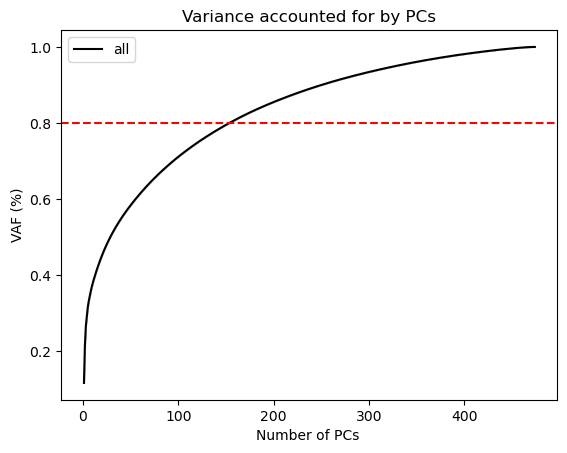

In [ ]:
# VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
fig, ax = plt.subplots()
dt.plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model)


In [10]:
from sklearn.decomposition import PCA
from tools.viz import utilityTools as utility
def plot_VAF(ax, data_list: list[pd.DataFrame], epoch=None, areas=["all"], model = None, n_components=10, n_neighbors=10):
    '''
    Plot VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
    '''
    if isinstance(data_list, pd.DataFrame):
        data_list = [data_list]
    if isinstance(areas, str):
        areas = [areas]
    if isinstance(areas, dict):
        units_per_area = list(areas.values())
        areas = list(areas.keys())
    else:    
        units_per_area = None
        
    for i,area in enumerate(areas):
        field = f'{area}_rates' if units_per_area is None else 'all_rates'
        VAF_per_area = []
        for session, df in enumerate(data_list):
            df_ = pyal.restrict_to_interval(df, epoch_fun=epoch) if epoch is not None else df
            rates = np.concatenate(df_[field].values, axis=0) 
            if units_per_area is not None:
                rates = rates[:, units_per_area[i][0]:units_per_area[i][1]]
                n_components = rates.shape[-1]
            model = PCA(n_components=n_components, svd_solver='full')
            rates_model = model.fit(rates)
            if isinstance(model, PCA):
                explained_variance_ratio = model.explained_variance_ratio_
            cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
            VAF_per_area.append(cumulative_explained_variance_ratio)
        x_ = np.arange(1, n_components + 1)
        utility.shaded_errorbar(ax, x_,  np.array(VAF_per_area).T ,label = area,color = getattr(params.colors, area, "k"))
        
    ax.set_xlabel('Number of PCs ')
    ax.set_ylabel('VAF (%)')
    ax.set_title('Variance accounted for by PCs')
    ax.axhline(y=0.8, color='red', linestyle='--')
    ax.legend()
    plt.show()

In [13]:
def plot_pairwise_corr(ax,df,areas,epoch):
    '''
    Plot pairwise correlation for one session for each area in areas list.
    '''
    if isinstance(areas, str):
        areas = [areas]
    if isinstance(areas, dict):
        units_per_area = list(areas.values())
        areas = list(areas.keys())
    else:    
        units_per_area = None
    if len(areas) == 1:
        ax = [ax]
    for i, area in enumerate(areas):
        # field = f'{area}_rates'  
        field = f'{area}_rates' if units_per_area is None else 'all_rates'
        df_ = pyal.restrict_to_interval(df, epoch_fun=epoch) if epoch is not None else df
        rates = np.concatenate(df_[field].values, axis=0)  
        if units_per_area is not None:
                rates = rates[:, units_per_area[i][0]:units_per_area[i][1]]
        correlation_matrix = np.corrcoef(rates.T)  
        sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap=params.colors.corr_cmap, cbar=True, ax=ax[i])
        
        # Set titles and labels
        ax[i].set_title(area)
        ax[i].set_xlabel("Neuron #")
        ax[i].set_ylabel("Neuron #")
    plt.show()

 

In [10]:
areas = {"Dls": (0,300), 'M1': (300, 474)}

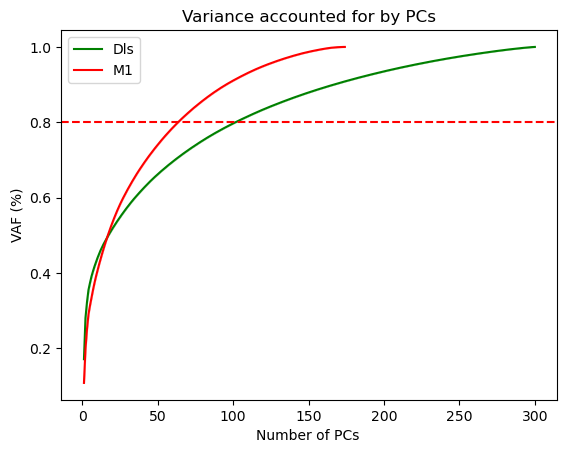

In [11]:
# VAF for each area in areas list, averaged across sessions in data_list, with shaded errorbars.
fig, ax = plt.subplots()
plot_VAF(ax = ax, data_list = data_list, areas = areas, n_components = n_components, epoch = epoch, model = model)

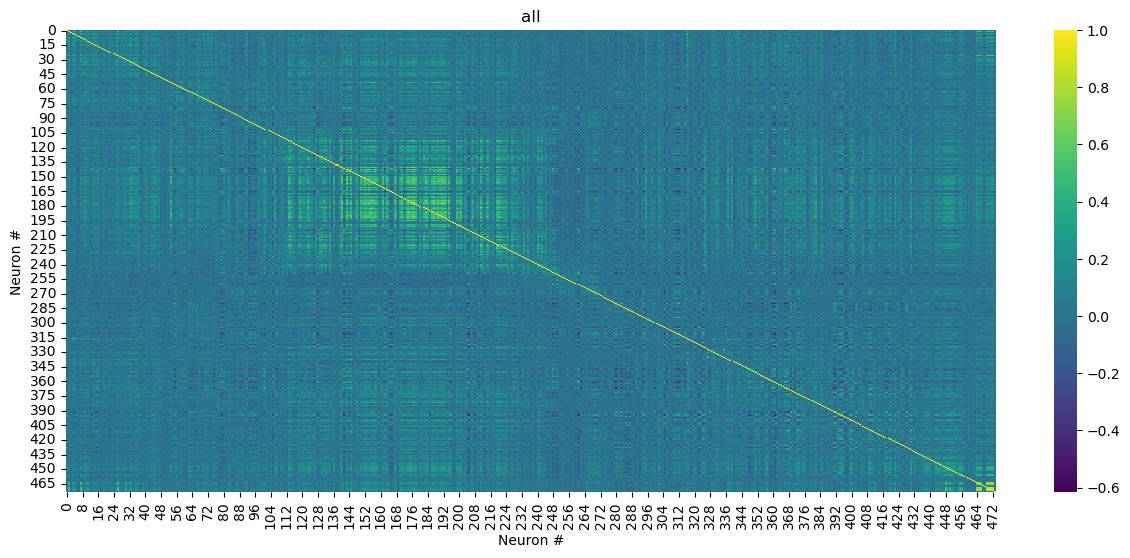

In [17]:
# Pairwise correlation for one session for each area in areas list
fig, axes = plt.subplots(1, len(areas), figsize=(15, 6))
dt.plot_pairwise_corr(axes,df_, areas = areas, epoch = epoch)

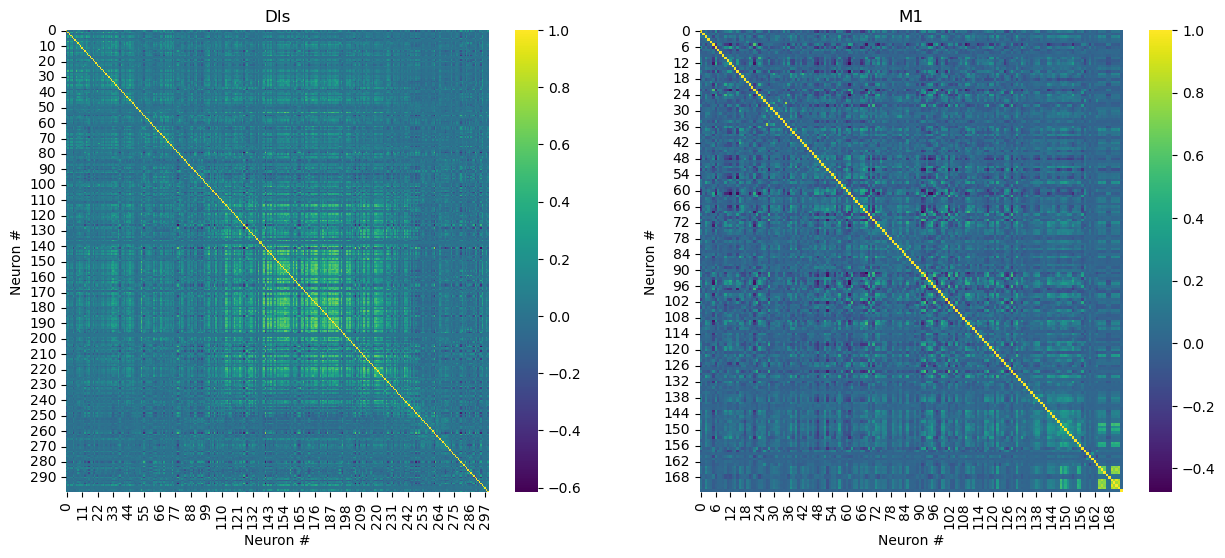

In [15]:
# Pairwise correlation for one session for each area in areas list
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_pairwise_corr(axes,df_, areas = areas, epoch = epoch)